## 8-1 시계열 데이터의 이해


#### 시계열 데이터란?

- 시계열 데이터란 시간 축을 따라 신호가 변하는 동적 데이터
- 고정 길이의 정적 데이터로 바꾸는 기법을 적용할 수 있지만, 정보 손실이 크고 변환 기법을 사람이 설계해야 하는 부담이 있음
- 딥러닝에서는 시계열의 특성을 활용하는 순환 신경망 또는 LSTM을 사용한다.

</br>

 - - -

</br>
 
#### 시계열 데이터의 특성

- 시간 정보가 없는 데이터는 특징의 순서를 바꿔 표현해도 아무 문제가 없다. 하지만, **시계열 데이터**와 같은 경우는 순서를 바꾸면 의미가 크게 훼손된다.
 
 ex) 나는 라면을 먹고 있는 중이다. -> .중이다 있는 먹고 라면을 나는
- 데이터 샘플의 길이가 다 다르다. 예를 들어, '인공지능'이라는 단어를 짧게 발음하는 사람이 있는 반면 '인~공~지~능'이라고 길게 발음하는 사람도 있다.

- 시계열은 주어와 서술어 사이가 멀게 떨어져 있더라도, 요소들에 대한 연관성인 문맥 의존성을 스스로 발견하고 표현하는 학습 능력이 있어야 한다.
   * 연관성이 깊은 요소가 멀리 떨어져서 나타나는 상황을 '장기 문맥 의존성'이라고 한다.

- 계절성을 가지는 데이터가 많다. 특정 계절, 상황에 대해서 관측치가 많은 데이터가 있을 것이다.

- - -

</br>

#### 시계열 패턴 하나로 미래를 예측하는 신경망 학습

* 미래를 예측하는 문제에서는 일정한 길이로 패턴을 잘라 여러 샘플을 만든다.
* 따라서 t+3을 예측하기 위해서 t, t+1, t+2를 보는 경우 w=3이 된다. 
    * 즉, 이전 요소 몇 개를 볼 것인지 나타내는 윈도우 크기 w를 설정해야 한다.
* 때로는 이틀 또는 일주일 후의 판매량을 예측해야 하는 경우가 생기는데, 얼마나 먼 미래를 예측할 것인지 지정하는 요인을 수평선 계수라고 한다. 
    * h(horizon factor)가 클수록 어려운 문제가 된다.

</br>

- - -

</br>

#### 예제) 비트코인 사례로 보는 시계열 데이터

- 디지털 통화에 관한 뉴스 사이트인 코인테스크(https://www.coindesk.com)에서 비트코인 데이터를 다운로드 가능
- 비트코인(BTC) 1년간의 데이터를 csv파일로 저장해서 read_csv해서 데이터를 로드

In [12]:
# 시계열 데이터 사례 : 비트코인 가격

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f = open('/content/sample_data/BTC_USD_2020-09-18_2021-09-17-CoinDesk.csv', 'r')
coindesk_data = pd.read_csv(f, header=0)
coindesk_data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2020-09-18,10937.111259,10966.386484,11061.284634,10762.417385
1,BTC,2020-09-19,10933.931162,10947.231375,11035.053201,10830.852471
2,BTC,2020-09-20,11048.879278,10940.134471,11180.395306,10904.199618
3,BTC,2020-09-21,10852.910139,11085.429004,11085.429004,10773.332194
4,BTC,2020-09-22,10526.202887,10925.510786,10991.694540,10322.594818


In [13]:
#종가에 대해서만 다루기

seq = coindesk_data[['Closing Price (USD)']].to_numpy() 
print('데이터 길이', len(seq), '\n앞쪽 5개의 값:', seq[0:5])

데이터 길이 365 
앞쪽 5개의 값: [[10937.1112591 ]
 [10933.9311624 ]
 [11048.87927816]
 [10852.91013894]
 [10526.2028872 ]]


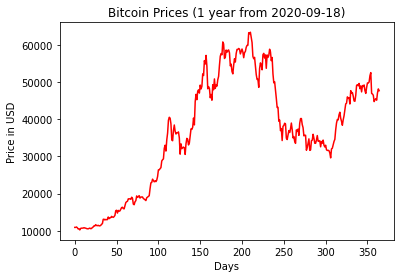

In [14]:
# 그래프로 데이터 확인

plt.plot(seq, color = 'red')
plt.title('Bitcoin Prices (1 year from 2020-09-18)')
plt.xlabel('Days')
plt.ylabel('Price in USD')
plt.show()

- 실제 데이터와 그래프 양상이 같음을 확인할 수 있음
- 한번 크게 치솟고 급락하다가 회복하는 추세를 확인할 수 있음

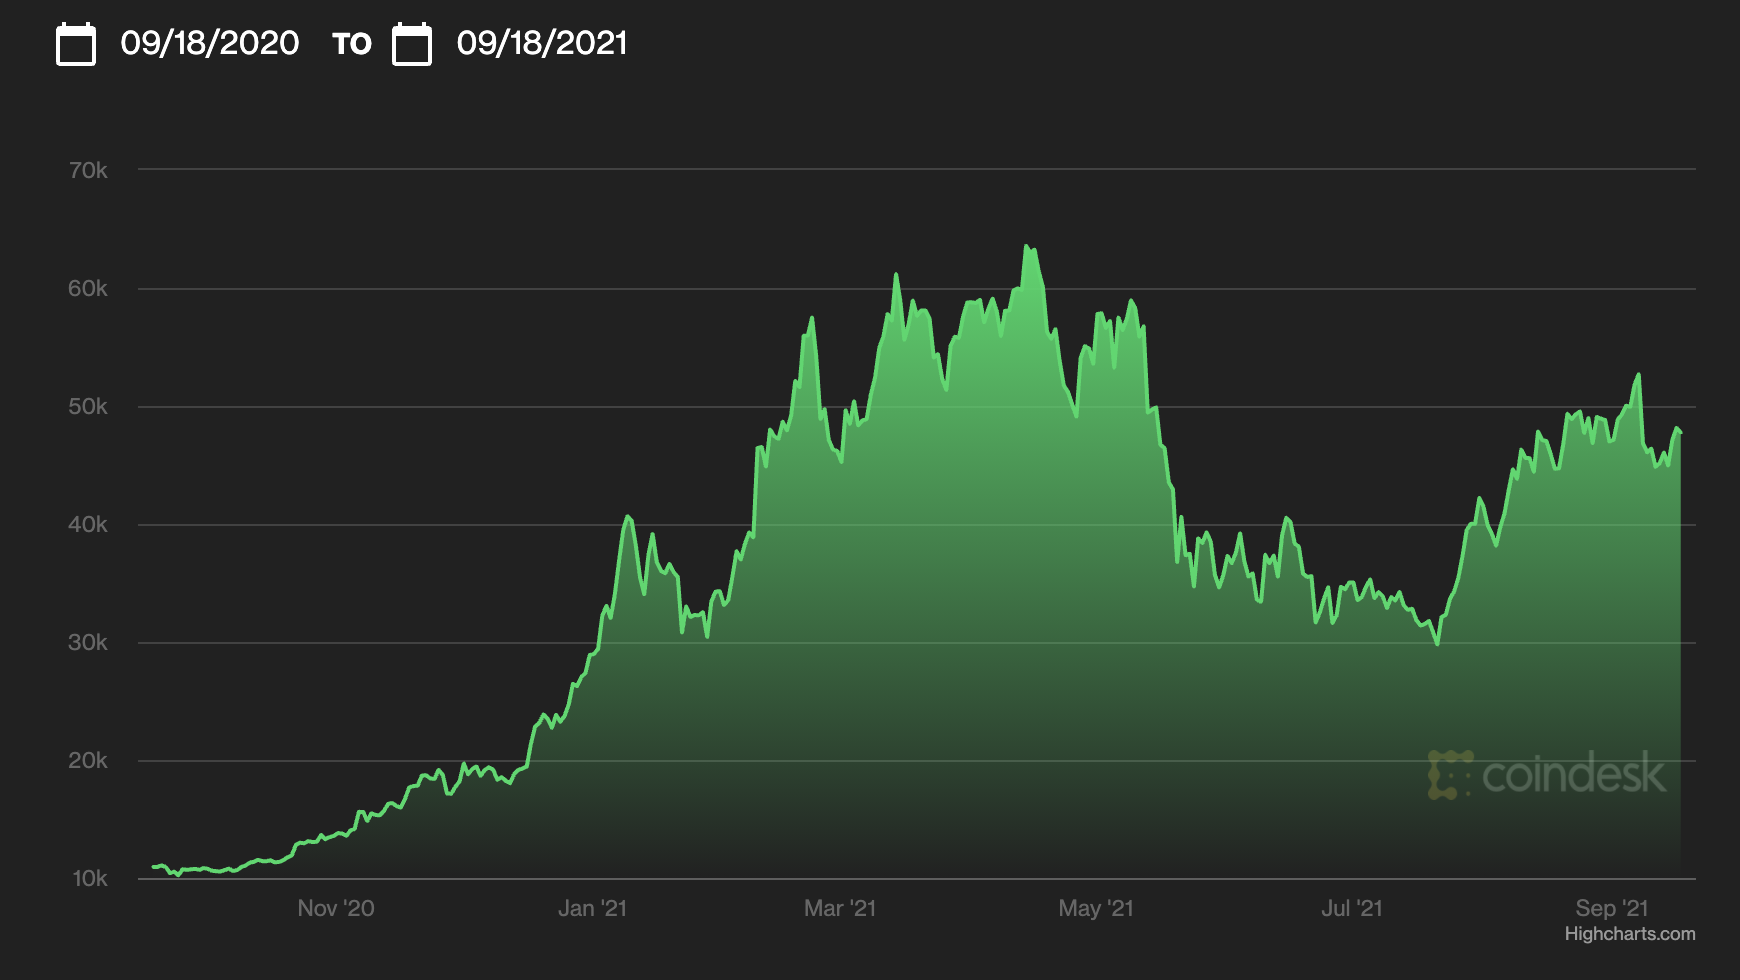

</br>

1년치 비트코인 가격 데이터를 윈도우로 자르기

In [15]:
# 시계열 데이터를 윈도우 단위로 자르는 함수 

def seq2dataset(seq, window, horizon):
  X=[]
  Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x = seq[i:(i+window)] #배열
    y = (seq[i+window+horizon-1])
    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)


w=7 #window
h=1 #horizon factor

X, Y = seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0], Y[0])
print(X[-1], Y[-1])

(358, 7, 1) (358, 1)
[[10937.1112591 ]
 [10933.9311624 ]
 [11048.87927816]
 [10852.91013894]
 [10526.2028872 ]
 [10531.16456263]
 [10260.03301241]] [10672.95680806]
[[46404.36448102]
 [44720.75555014]
 [45253.13062479]
 [45510.56324938]
 [45097.79721752]
 [47039.94993112]
 [48125.11878385]] [47648.50198766]


## 8-2 순환 신경망 

In [17]:
!pip install tensorflow

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


# 훈련 집합과 테스트 집합으로 분할 
split = int(len(X)*0.7)
X_train=X[0:split]
y_train=Y[0:split]
X_test = X[split:]
y_test = Y[split:]

X_train[0]

array([[10937.1112591 ],
       [10933.9311624 ],
       [11048.87927816],
       [10852.91013894],
       [10526.2028872 ],
       [10531.16456263],
       [10260.03301241]])

In [23]:
# LSTM 모델 설계 및 학습

model = Sequential()
model.add(LSTM(units=128, activation='relu',input_shape=X_train[0].shape)) # X_train.shape = (7, 1)
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
hist = model.fit(X_train, y_train, epochs=200, batch_size=1, validation_data=(X_test,y_test),verbose=2)


# LSTM 모델 평가
ev = model.evaluate(X_test, y_test, verbose=0)
print("loss function :",ev[0], "MAE : ",ev[1])

Epoch 1/200
250/250 - 3s - loss: 11604.9424 - mae: 11604.9424 - val_loss: 2732.2361 - val_mae: 2732.2361
Epoch 2/200
250/250 - 1s - loss: 2873.2507 - mae: 2873.2507 - val_loss: 2055.2529 - val_mae: 2055.2529
Epoch 3/200
250/250 - 1s - loss: 2758.3196 - mae: 2758.3196 - val_loss: 2490.7998 - val_mae: 2490.7998
Epoch 4/200
250/250 - 1s - loss: 2724.8975 - mae: 2724.8975 - val_loss: 1998.4257 - val_mae: 1998.4257
Epoch 5/200
250/250 - 1s - loss: 2582.5571 - mae: 2582.5571 - val_loss: 2380.1287 - val_mae: 2380.1287
Epoch 6/200
250/250 - 1s - loss: 2532.3474 - mae: 2532.3474 - val_loss: 1966.1735 - val_mae: 1966.1735
Epoch 7/200
250/250 - 1s - loss: 2588.8611 - mae: 2588.8611 - val_loss: 2336.0996 - val_mae: 2336.0996
Epoch 8/200
250/250 - 1s - loss: 2654.4792 - mae: 2654.4792 - val_loss: 3202.2642 - val_mae: 3202.2642
Epoch 9/200
250/250 - 1s - loss: 2530.6418 - mae: 2530.6418 - val_loss: 2538.7344 - val_mae: 2538.7344
Epoch 10/200
250/250 - 1s - loss: 2274.8318 - mae: 2274.8318 - val_loss

In [24]:
# LSTM model test

pred = model.predict(X_test)
print("MAPE:", sum(abs(y_test-pred)/(y_test-pred)/len(X_test)))

MAPE: [0.24074074]


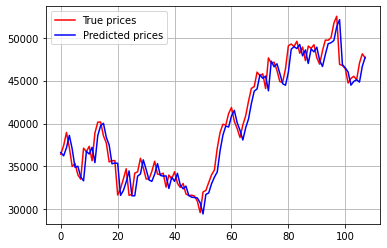

In [25]:
# visualization predict result

x_range=range(len(y_test))
plt.plot(x_range,y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()